## CREDIT CARD DEFAULT ANAYLIS


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [53]:


df = pd.read_csv("creditcard.csv")


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

renaming all columns

In [55]:
# Set the first row as header
df.columns = df.iloc[0]    # assign first row as column names
df = df[1:]                # drop the first row
df = df.reset_index(drop=True)  # reset the index





In [56]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [57]:
cols=['SEX','EDUCATION','MARRIAGE']
for i in cols :
    print(df[i].value_counts())

SEX
2    18112
1    11888
Name: count, dtype: int64
EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64
MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64


In [66]:
pd.to_numeric(df['EDUCATION'])

0        2
1        2
2        2
3        2
4        2
        ..
29995    3
29996    3
29997    2
29998    3
29999    2
Name: EDUCATION, Length: 30000, dtype: int64

In [73]:
df['EDUCATION'] = pd.to_numeric(df['EDUCATION'], errors='coerce')
df['EDUCATION'] = df['EDUCATION'].replace({5: 4, 6: 4,0:4})


In [74]:
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

In [75]:
df['MARRIAGE'] = pd.to_numeric(df['MARRIAGE'], errors='coerce')
df['MARRIAGE'] = df['MARRIAGE'].replace({0:3})

In [76]:
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

In [89]:
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')
    df[column] = df[column]


In [90]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [91]:
df.drop(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
         'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], axis=1).describe()


,ID,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [96]:
numeric_cols = ['LIMIT_BAL', 'AGE',
                'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
                'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    outliers =[]
    for i in df[col]: 
        if(i< lower or i > upper):
            outliers.append(i)
    print('outlier% =',len(outliers)/len(col))
    print(f"{col} max",max(outliers))
    print(f"{col} min",min(outliers))
    print(f"{col} mean",statistics.mean(outliers))
       
   


outlier% = 18.555555555555557
LIMIT_BAL max 1000000
LIMIT_BAL min 530000
LIMIT_BAL mean 617844.3113772455
outlier% = 90.66666666666667
AGE max 79
AGE min 61
AGE mean 64.47426470588235
outlier% = 266.6666666666667
BILL_AMT1 max 964511
BILL_AMT1 min -165580
BILL_AMT1 mean 248800.735
outlier% = 266.1111111111111
BILL_AMT2 max 983931
BILL_AMT2 min 155635
BILL_AMT2 mean 240521.76534446765
outlier% = 274.3333333333333
BILL_AMT3 max 1664089
BILL_AMT3 min -157264
BILL_AMT3 mean 230007.7772377481
outlier% = 291.3333333333333
BILL_AMT4 max 891586
BILL_AMT4 min -170000
BILL_AMT4 mean 209410.58276125096
outlier% = 302.77777777777777
BILL_AMT5 max 927171
BILL_AMT5 min -81334
BILL_AMT5 mean 194950.56880733944
outlier% = 299.22222222222223
BILL_AMT6 max 961664
BILL_AMT6 min -339603
BILL_AMT6 mean 190677.65131823244
outlier% = 343.125
PAY_AMT1 max 873552
PAY_AMT1 min 11016
PAY_AMT1 mean 34696.417486338796
outlier% = 339.25
PAY_AMT2 max 1684259
PAY_AMT2 min 11253
PAY_AMT2 mean 38872.348194546794
outlie

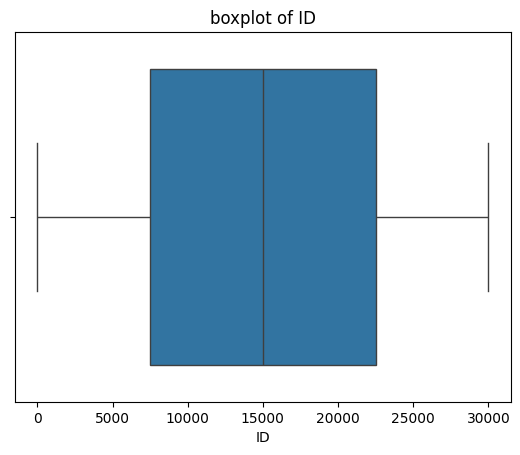

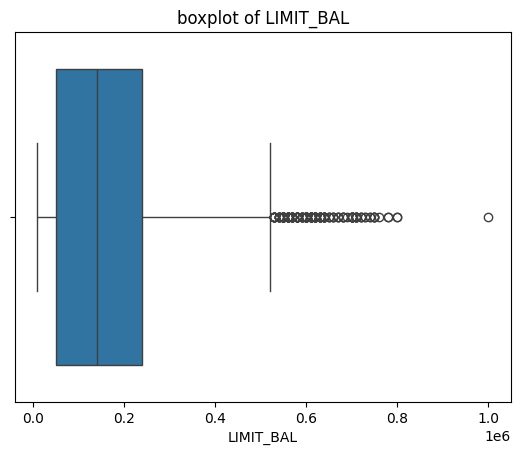

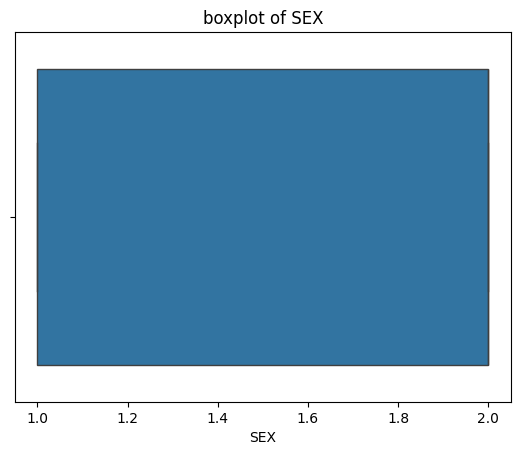

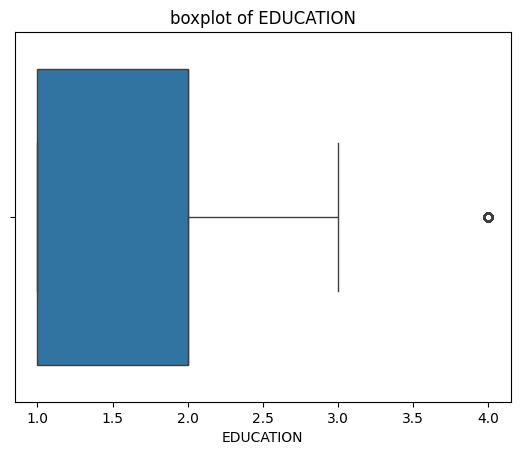

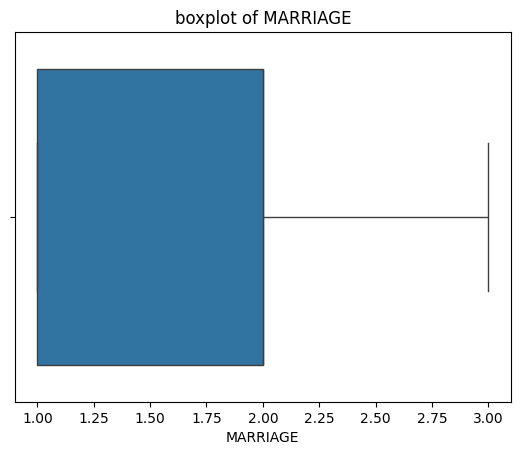

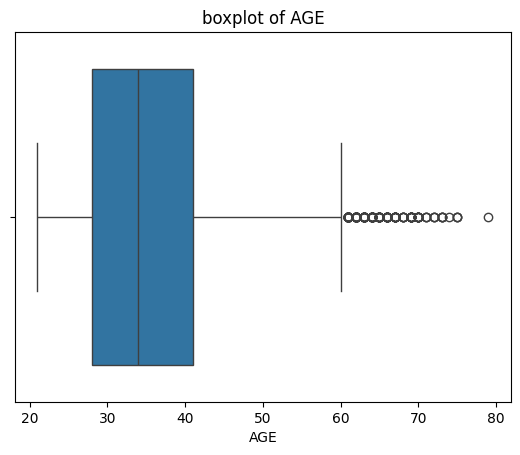

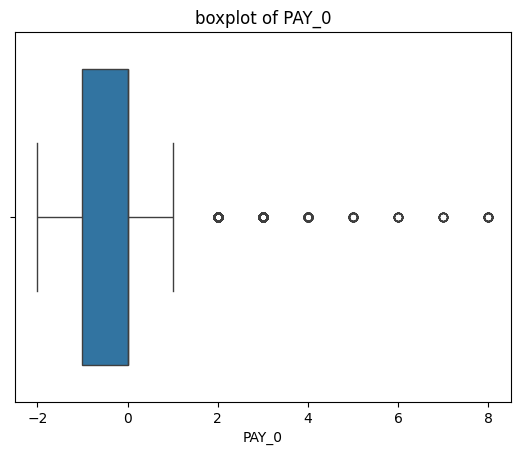

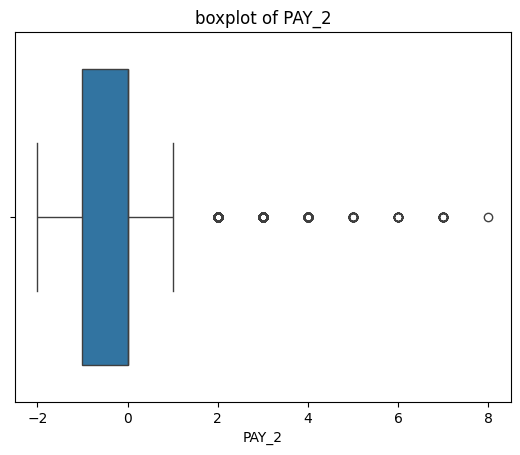

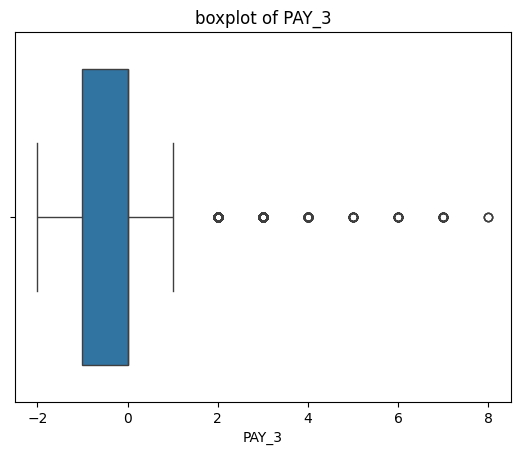

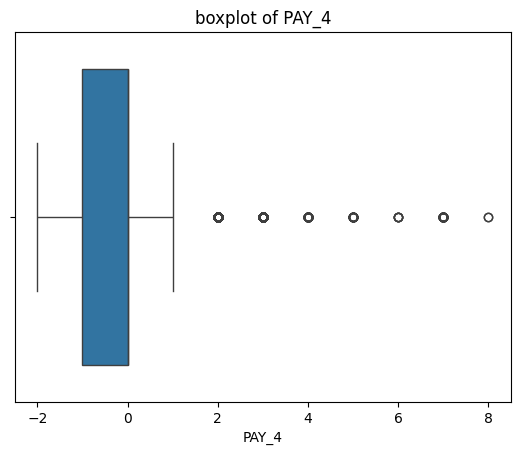

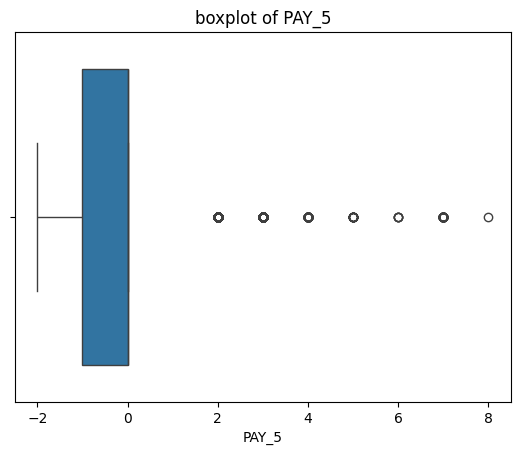

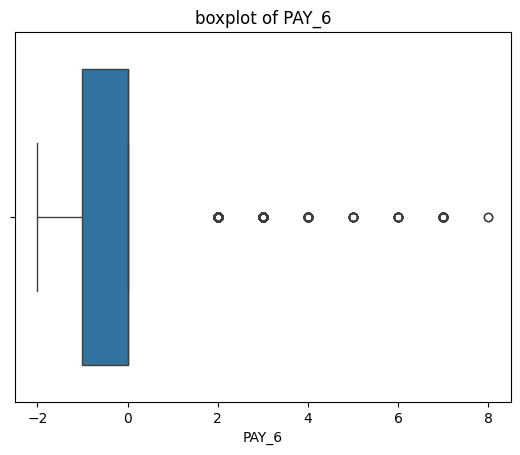

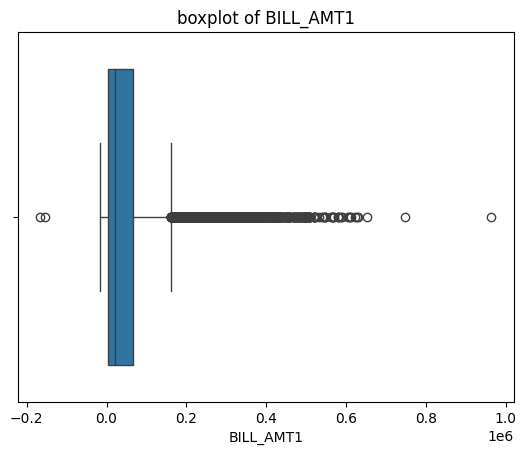

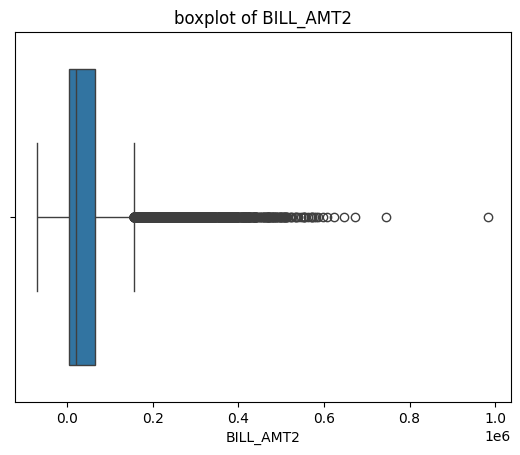

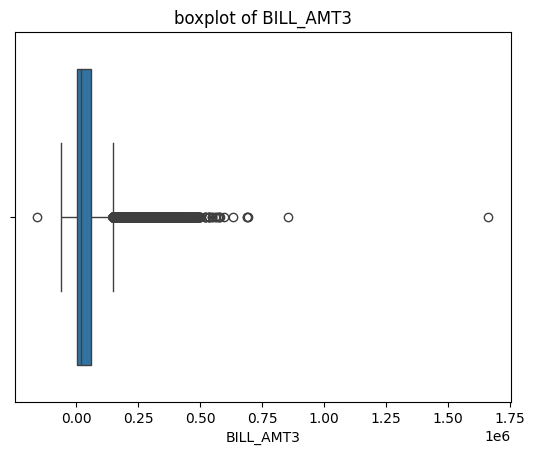

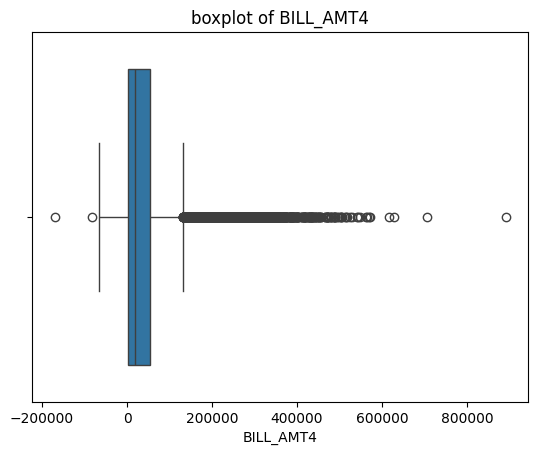

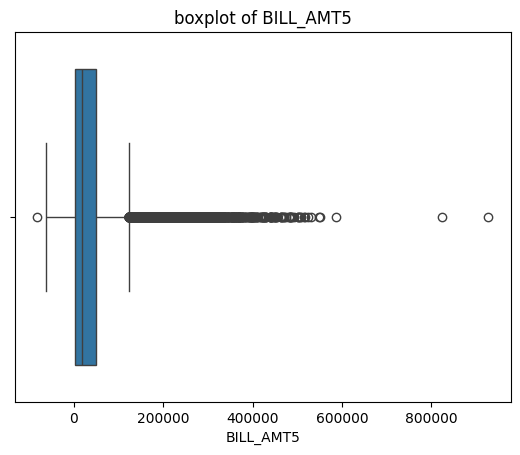

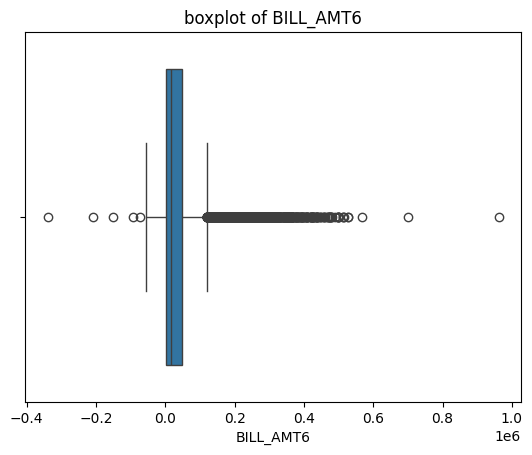

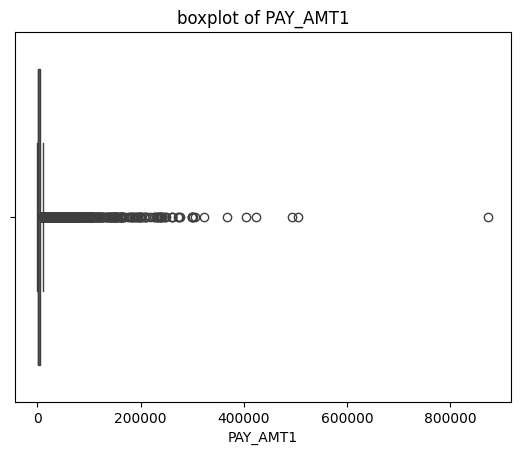

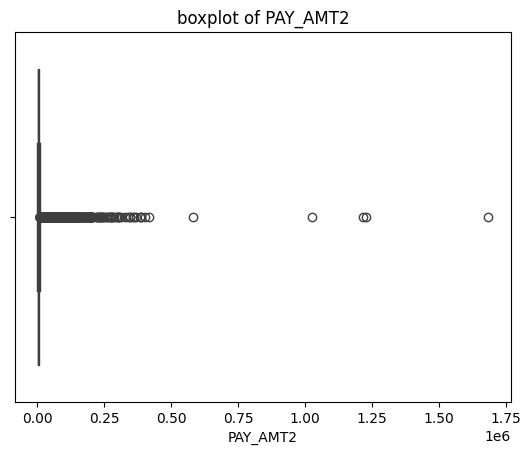

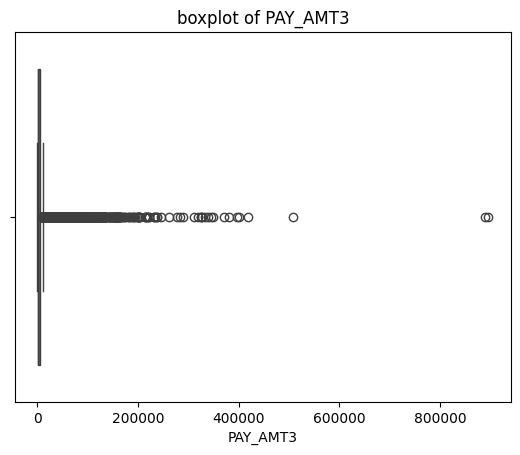

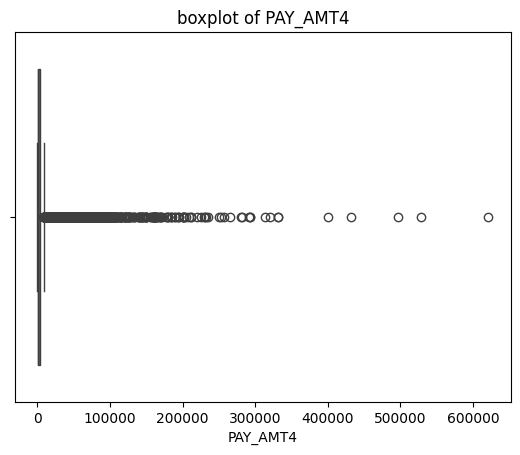

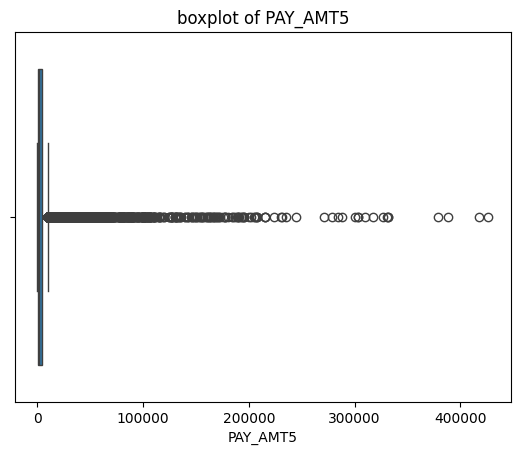

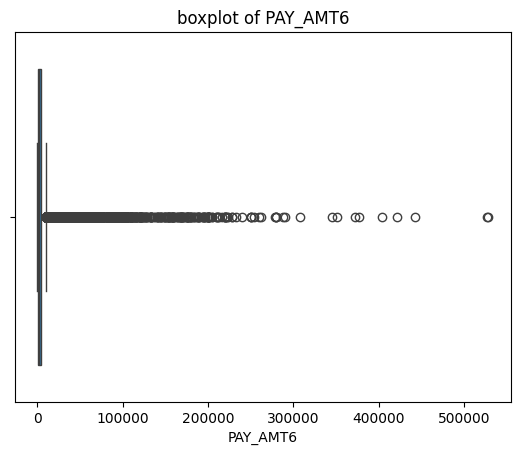

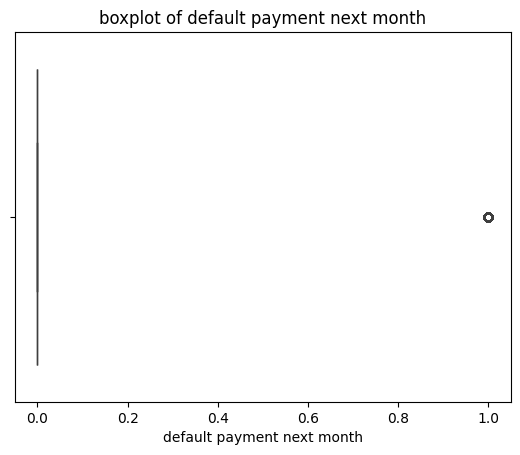

In [97]:
for column in df.columns:
    sns.boxplot(x=df[column])
    plt.title(f"boxplot of {column}")
    plt.show()